<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Laboratorio_03_reg_lin_grad_descV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio 03
## Andrés López Echeverri


1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|




2. Crear una función para calcular la función de coste.

3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.



4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.

5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.






#Solución

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##1)

In [125]:
entrenamiento = np.array([0,1,2,3,4,'m'])
y=np.arange(0,6)
x=np.arange(0,6)

df = pd.DataFrame({'Entrenamiento':entrenamiento,'Y':y,'X_1':x}).set_index('Entrenamiento')
df

,Y,X_1
Entrenamiento,,
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
m,5,5


##2)

In [126]:
def cost(theta_0,theta_1,X,y):
  m=len(y)
  J=0
  for i in range(m):
    h=theta_0+theta_1*X[i]
    J=J+(h-y[i])**2
  J=J/(2*m)
  return J

In [127]:
def lineal(theta_0,theta_1,x):
  return theta_0+theta_1*x

##3)

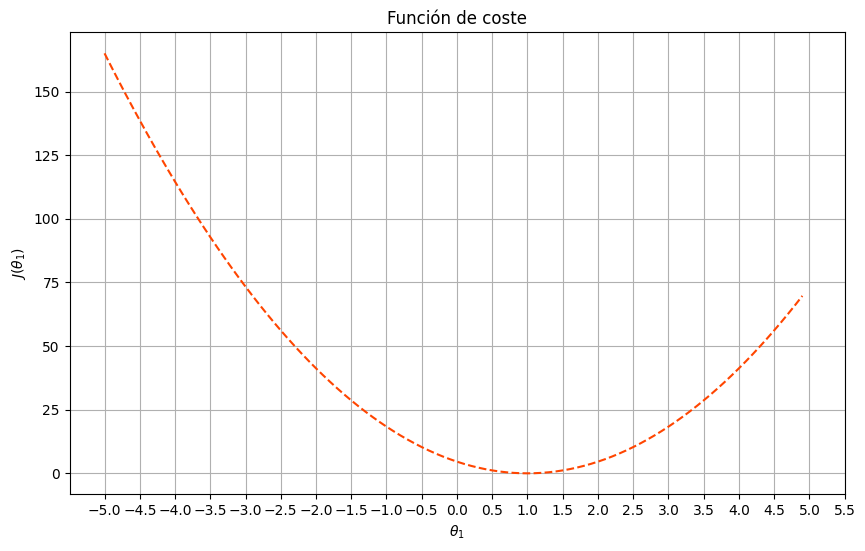

El valor minimo de la función de coste es 2.082592789783471e-27 con theta_1 = 0.9999999999999787


In [128]:
theta_0 = 0

theta_1 = np.arange(-5,5,0.1)
Js = cost(theta_0,theta_1,x,y)

fig = plt.figure(figsize=(10,6))
plt.plot(theta_1,Js,'--',color='orangered')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$J(\theta_1)$')
plt.title('Función de coste')
plt.xticks(np.arange(-5,6,0.5))
plt.grid()
plt.show()
print("El valor minimo de la función de coste es",Js.min(),"con theta_1 =",theta_1[Js.argmin()])

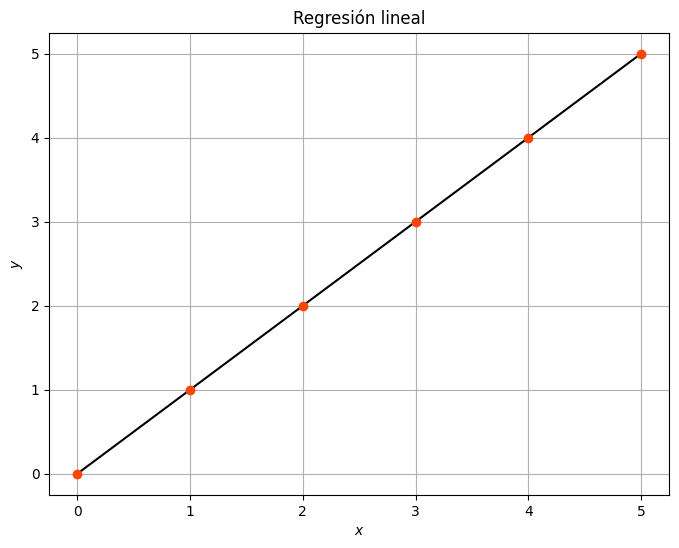

In [129]:
t1 = theta_1[Js.argmin()]

fig = plt.figure(figsize=(8,6))

regr = lineal(theta_0,t1,df['X_1'])
plt.plot(df['X_1'],regr,'k')
plt.plot(df['X_1'],df['Y'],'o',color='orangered')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Regresión lineal')
plt.grid()
plt.show()

##4)

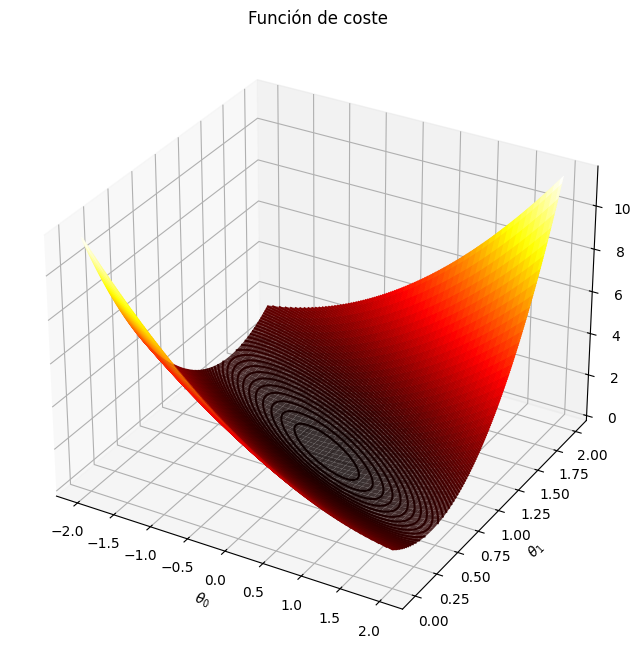

In [130]:
#meshgrid
theta_0=np.linspace(-2,2,100)
theta_1=np.linspace(0,2,100)

t0,t1=np.meshgrid(theta_0,theta_1)
JS = cost(t0,t1,x,y)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(t0, t1, JS, cmap='hot', alpha=0.8)
ax.contour(t0, t1, JS, 200, linestyles="solid", cmap='hot')
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_title("Función de coste")
plt.show()

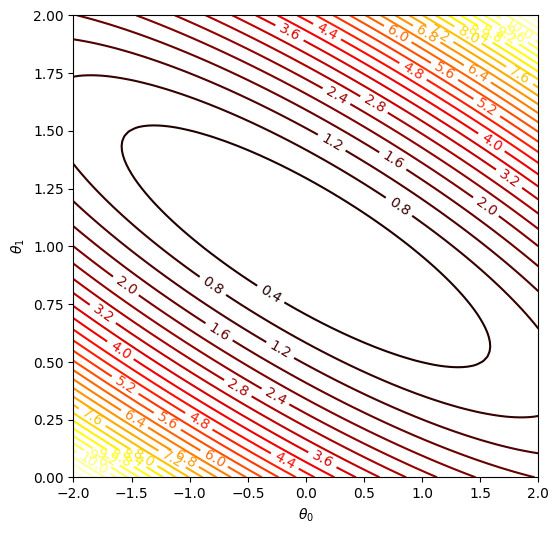

In [131]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
surf=ax.contour(t0, t1, JS, 35, linestyles="solid", cmap='hot')
ax.clabel(surf, inline=True, fontsize=10)
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()

##5)

### Función de coste teórica en 1D

En el caso unidimensional se tienen dos parámetros $\theta_0$ y $\theta_1$ y una sola variable $x$
Así la hipotesis para hacer la regresión lineal:
$$h_\theta(x)=\theta_0+\theta_1x$$
La función de coste será:
\begin{equation}
J(\theta_0, \theta_1)=\frac{1}{2m} \sum_{i=0}^m ( \theta_0+\theta_1x^{(i)}-y^{(i)})^2
\end{equation}

###Función de coste teórica en 2D

En el caso unidimensional se tienen tres parámetros $\theta_0$, $\theta_1$ y $\theta_2$ y dos variables $x_1$ y $x_2$
Así la hipotesis para hacer la regresión lineal:
$$h_\theta(x,y)=\theta_0+\theta_1x_1+\theta_2x_2$$
La función de coste será:
\begin{equation}
J(\theta_0, \theta_1,\theta_2)=\frac{1}{2m} \sum_{i=0}^m ( \theta_0+\theta_1x_1^{(i)}+\theta_2x_2^{(i)}-y^{(i)})^2
\end{equation}

-------------------------

# Gradiente Descendente


Para determinar el mínimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:

- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el mínimo de la función


6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$


7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.



#Solución

##6)

In [132]:
def gradient_descent(alpha, dfunc, eps = 1e-4, w0=0):
    wi = w0
    while True:
      wi = wi - alpha * dfunc(wi)
      if abs(dfunc(wi)) < eps:
        break
    return wi

In [133]:
def F(x):
  return (x-4)**2

def dF(x):
  return 2*(x-4)

In [134]:
minx = gradient_descent(0.1,dF)
minx

3.999954328073833

In [135]:
minx = gradient_descent(0.01,dF)
minx

3.9999501762624257

In [136]:
minx = gradient_descent(0.001,dF)
minx

3.9999500756002346

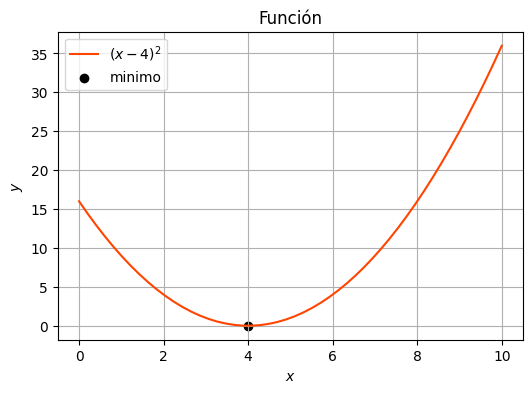

In [137]:
fig = plt.figure(figsize=(6,4))
xs = np.linspace(0,10)
plt.plot(xs,F(xs),color='orangered',label = f'$(x-4)^2$')
plt.scatter(minx,dF(minx),color='k',label='minimo')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Función')
plt.grid()
plt.legend()
plt.show()

##7)
\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

In [138]:
def F2(x,y):
  return np.sin(0.5*x**2-0.25*y**2+3)*np.cos(2*x+1-np.exp(y))

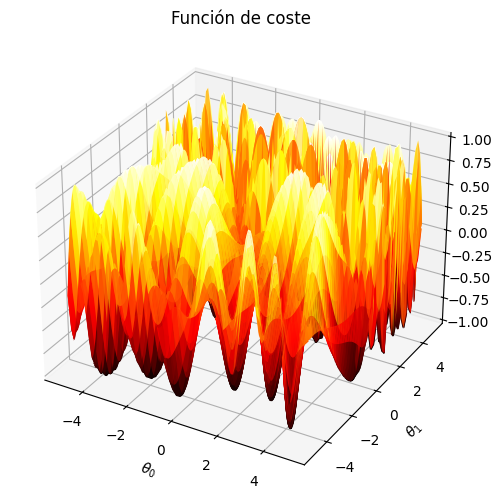

In [139]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)

X,Y = np.meshgrid(x,y)
FS = F2(X,Y)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, FS, cmap='hot', alpha=0.8)
ax.contour(X, Y, FS, 200, linestyles="solid", cmap='hot')
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_title("Función de coste")
plt.show()

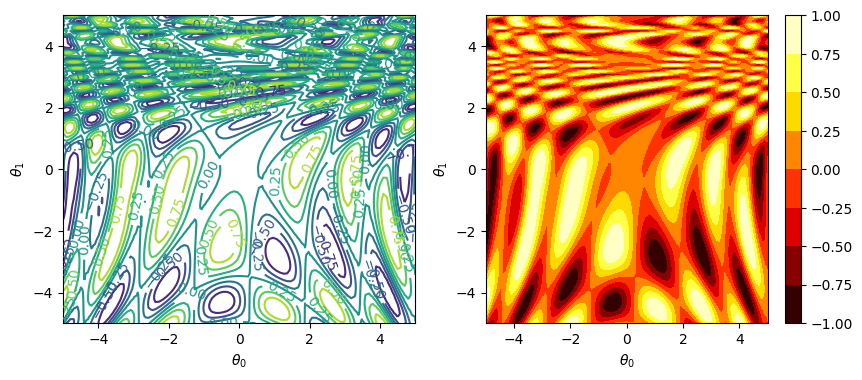

In [140]:
fig , axs = plt.subplots(1,2,figsize=(10,4))
ax=axs[0]
surf=ax.contour(X, Y, FS, 7, linestyles="solid", cmap='viridis')
ax.clabel(surf, inline=True, fontsize=10)
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")

ax=axs[1]
surf=ax.contourf(X, Y, FS, linestyles="solid", cmap='hot')
ax.cbar = fig.colorbar(surf, ax=ax)
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()

In [141]:
import sympy as sp

x, y = sp.symbols('x,y')

F2 = sp.sin(0.5*x**2-0.25*y**2+3)*sp.cos(2*x+1-sp.exp(y))
dF2_x = sp.diff(F2,x)
dF2_y = sp.diff(F2,y)

F2 = sp.lambdify((x,y),F2)
dF2_x = sp.lambdify((x,y),dF2_x)
dF2_y = sp.lambdify((x,y),dF2_y)

In [142]:
def gradient_descent_2D(alpha, dfunc1, dfunc2, w0, w1, eps = 1e-4):
    winew = w0
    wjnew = w1
    i=0
    while True:
      i=i+1
      if i==100000:
        print("Se alcanzó numero maximo de iteraciones")
        break
      wi = winew
      wj = wjnew
      winew = wi - alpha * dfunc1(wi,wj)
      wjnew = wj - alpha * dfunc2(wi,wj)
      if abs(dfunc1(wi,wj)) < eps and abs(dfunc2(wi,wj)) < eps:
        break
    return wi,wj

In [143]:
X, Y = gradient_descent_2D(0.1,dF2_x,dF2_y,-2,-4)
print(f"La grafica tiene un minimo en (x,y)={X},{Y} de f(x,y)={F2(X,Y)}")

La grafica tiene un minimo en (x,y)=-2.0592848909905537,-3.768064925726758 de f(x,y)=-0.9999999961447333


# Modelo de *machine learning*: Solución general

Un modelo general para solucionar un problema de machinine learning puede ser estructurado como sigue:


a. Eliger el modelo a emplear:
\begin{equation}
h(X,\Theta)
\end{equation}

- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:

    \begin{equation}
    h(X) = (\theta_0 + \theta_1 X)
    \end{equation}


b. Eligir la funcion de coste :
-  Metrica Ecuclidiana:
\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}
- [Lista de funciones de coste que pueden ser empleadas](https://jmlb.github.io/flashcards/2018/04/21/list_cost_functions_fo_neuralnets/)


c. Aplicar el gradiente descendente iterativamente, hasta encontrar el minimo:  

\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\Theta)
\end{equation}



- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:


\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}

8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.

9. Compare su resultado empleando la libreria linearRegresion() de sklearn.


##8)

In [148]:
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)

In [178]:
theta_0=np.linspace(-1,1,1000)
theta_1=np.linspace(-1,1,1000)

t0,t1=np.meshgrid(theta_0,theta_1)
JS = cost(t0,t1,X,y)

min_index = np.unravel_index(np.argmin(JS), JS.shape)

min0 = t0[min_index]
min1 = t1[min_index]

print("El valor mínimo de la función de coste es",
      JS[min_index],
      "con theta_0 =", min0.round(5),
      "y theta_1 =", min1.round(5))

El valor mínimo de la función de coste es 1.8572652045788976e-05 con theta_0 = 0.21121 y theta_1 = 0.1992


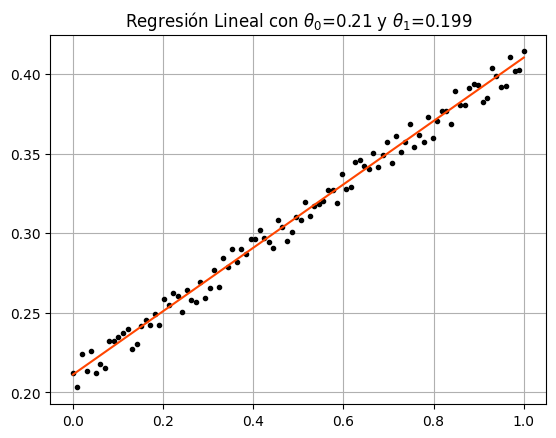

In [187]:
fs=lineal(min0,min1,X)
plt.plot(X,y,'.',color='k')
plt.plot(X,fs,color='orangered')
plt.grid()
plt.title(r"Regresión Lineal con $\theta_0$=0.21 y $\theta_1$=0.199")
plt.show()

##9)

In [205]:
from sklearn.linear_model import LinearRegression

In [204]:
X_reshaped = X.reshape(-1, 1)

model = LinearRegression()
model.fit(X_reshaped, y)

theta_0 = model.intercept_
theta_1 = model.coef_[0]

print(r"theta_0:", theta_0)
print(r"theta_1:", theta_1)

print(r"La diferencia de theta_0 entre los dos metodos es",abs(theta_0-min0))
print(r"La diferencia de theta_1 entre los dos metodos es",abs(theta_1-min1))

theta_0: 0.21075416104188854
theta_1: 0.1988843873622934
La diferencia de theta_0 entre los dos metodos es 0.0004570501693226814
La diferencia de theta_1 entre los dos metodos es 0.00031481183690584835


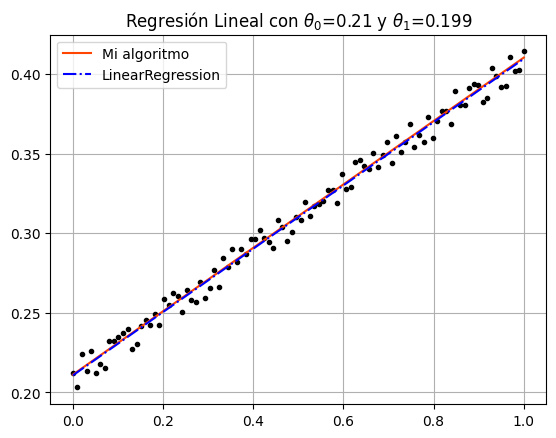

In [198]:
fs2=lineal(theta_0,theta_1,X)
plt.plot(X,y,'.',color='k')
plt.plot(X,fs,color='orangered',label='Mi algoritmo')
plt.plot(X,fs2,'-.',color='blue',label='LinearRegression')
plt.legend()
plt.grid()
plt.title(r"Regresión Lineal con $\theta_0$=0.21 y $\theta_1$=0.199")
plt.show()